## Вычисление метрики pr-auc и кривой precision-recall после тренировки модели

### Загружаем переобученную модель

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
from darkflow.net.build import TFNet
import sys

In [2]:
sys.path.insert(0, '../verificator')

In [3]:
# weights = os.path.join(build_path, 'bin', 'yolo.weights')
build_path = os.path.expanduser('~/d_test/data/models/yolo_init_config')
model = os.path.join(build_path, 'cfg', 'yolo-people.cfg')
cfg = os.path.join(build_path, 'cfg')
labels = os.path.join(build_path, 'labels.txt')
backup = os.path.expanduser('~/d_test/data/models/darkflow_retrain_all_imgs/full_data/ckpt')
summary = os.path.expanduser('~/d_test/data/models/darkflow_retrain_all_imgs/full_data/summary')

options = dict()
options['model'] = model
options['labels'] = labels
options['train'] = False
options['gpu'] = 0.8
options["subdivisions"] = 1
options['threshold'] = 0.5
options['backup'] = backup
options['summary'] = summary
options['load'] = -1


In [10]:
import matplotlib.pyplot as plt
import cv2

### Смотрим на изображения

In [11]:
images_source_path = os.path.expanduser('~/d_test/data/stuff_data/cam_1_imgs')
img = os.path.join(images_source_path, os.listdir(images_source_path)[0])
img_data = cv2.imread(img)
img_data = cv2.cvtColor(img_data, cv2.COLOR_BGR2RGB)

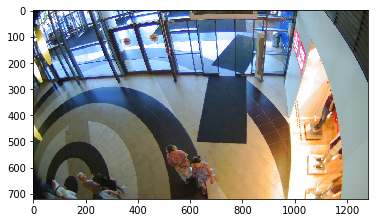

In [12]:
plt.imshow(img_data)
plt.show()

### Готовим файлы для серийного предсказания при разных порогах

In [29]:
from verificator.utils.markup_and_predict import darkflow_predict_boxes_from_model

In [16]:
test_data = os.path.expanduser('~/d_test/data/stuff_data/cam_1_hand_markup/to_xml_all/test') # xml-файлы, которые использовались для валидации модели

In [19]:
filenames = [os.path.splitext(x)[0] for x in os.listdir(test_data)] # список имен изображений, на которых будем мерить pr

In [22]:
images_names_in_source_dir = [os.path.splitext(x)[0] for x in os.listdir(images_source_path)]

In [23]:
for imagename in filenames:
    assert imagename in images_names_in_source_dir

In [24]:
path_for_metrics = os.path.expanduser('~/d_test/data/models/darkflow_retrain_all_imgs/metrics/retrained')

In [25]:
import numpy as np

In [26]:
thresholds = np.linspace(0., 0.9, 10)

In [27]:
thresholds

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])

In [30]:
for threshold in thresholds:
    options['threshold'] = threshold
    data_filename = 'threshold_' + str(threshold) + '.json'
    log_filename = 'log_threshold_' + str(threshold) + '.txt'
    tfnet = TFNet(options)
    darkflow_predict_boxes_from_model(tfnet, images_source_path, path_for_metrics, filelist = filenames,
                           num_files=None, data_filename=data_filename, log_filename=log_filename,
                           verbose=False)

Parsing /home/shareduser/d_test/data/models/yolo_init_config/cfg/yolo-people.cfg
Loading None ...
Finished in 0.00023412704467773438s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 76, 76, 256)
 Init 

 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 19, 19, 1024)
 Init  |  Yep!  | conv 1x1p0_1    linear           | (?, 19, 19, 30)
-------+--------+----------------------------------+---------------
GPU mode with 0.8 usage
Loading from /home/shareduser/d_test/data/models/darkflow_retrain_all_imgs/full_data/ckpt/yolo-people-10600
INFO:tensorflow:Restoring parameters from /home/shareduser/d_test/data/models/darkflow_retrain_all_imgs/full_data/ckpt/yolo-people-10600
Finished in 4.233848810195923s

Parsing /home/shareduser/d_test/data/models/yolo_init_config/cfg/yolo-people.cfg
Loading None ...
Finished in 0.00013780593872070312s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304

 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 19, 19, 1024)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 19, 19, 1024)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 19, 19, 1024)
 Load  |  Yep!  | concat [16]                      | (?, 38, 38, 512)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 38, 38, 64)
 Load  |  Yep!  | local flatten 2x2                | (?, 19, 19, 256)
 Load  |  Yep!  | concat [27, 24]                  | (?, 19, 19, 1280)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 19, 19, 1024)
 Init  |  Yep!  | conv 1x1p0_1    linear           | (?, 19, 19, 30)
-------+--------+----------------------------------+---------------
GPU mode with 0.8 usage
Loading from /home/shareduser/d_test/data/models/darkflow_retrain_all_imgs/full_data/ckpt/yolo-people-10600
INFO:tensorflow:Restoring parameters from /home/shareduser/d_test/data/models/darkflow_retrain_all_imgs/full_data/ckpt/yolo-people-10600
Finished in 4.192342519760132s

 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 38, 38, 512)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 19, 19, 512)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 19, 19, 1024)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 19, 19, 512)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 19, 19, 1024)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 19, 19, 512)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 19, 19, 1024)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 19, 19, 1024)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 19, 19, 1024)
 Load  |  Yep!  | concat [16]                      | (?, 38, 38, 512)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 38, 38, 64)
 Load  |  Yep!  | local flatten 2x2                | (?, 19, 19, 256)
 Load  |  Yep!  | concat [27, 24]                  | (?, 19, 19, 1280)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 19, 19, 1024)
 Init  |  Yep!

In [56]:
from verificator.utils.markup_and_predict import detection_scores

In [76]:
% matplotlib inline

In [100]:
import matplotlib.pyplot as plt

In [101]:
from sklearn.metrics import auc

In [81]:
path2 = os.path.expanduser('~/d_test/data/stuff_data/cam_1_hand_markup/to_xml_all/metrics')

In [82]:
gt_file = 'test_gt.json'

In [84]:
with open(os.path.join(path2,gt_file), 'r') as f:
    gt_data = json.loads(f.read())
automarked_files = [file for file in os.listdir(path2) if 'threshold' in file]
with open(os.path.join(path2, automarked_files[0]), 'r') as f:
    sample_data = json.loads(f.read())
print('number of images in gt: {}'.format(len(gt_data.keys())))
print('number of images in sample: {}'.format(len(sample_data.keys())))

number of images in gt: 531
number of images in sample: 531


In [225]:
num_bbox_gt = 0
for k,v in gt_data.items():
    npers = v['n_boxes']
    num_bbox_gt += npers

In [226]:
num_bbox_gt

1414

In [ ]:
len()

In [87]:
data_ = { k.split('\\')[-1]: v for k,v in gt_data.items() }
with open(os.path.join(path2, gt_file), 'w') as f:
    json.dump(data_, f)

In [97]:
scores = []
for threshold in thresholds:
    for file in os.listdir(path_for_metrics):
        if str(threshold) in file and file.endswith('.json'):
            print(file)
            precision, recall, HITS_TOT, NO_TOT, NR_TOT = detection_scores(os.path.join(path2, gt_file),
                                                                           os.path.join(path_for_metrics, file))
            scores.append({'threshold': threshold,
                           'precision': precision,
                           'recall': recall,
                           'hits': HITS_TOT,
                           'number of detections': NO_TOT,
                           'number of relevant objects': NR_TOT})

threshold_0.0.json
threshold_0.1.json
threshold_0.2.json
threshold_0.3.json
threshold_0.4.json
threshold_0.5.json
threshold_0.6.json
threshold_0.7.json
threshold_0.8.json
threshold_0.9.json


In [98]:
prec = []
rec = []
for s in scores:
    prec.append(s['precision'])
    rec.append(s['recall'])

## Строим кривую precision-recall для дообученной модели

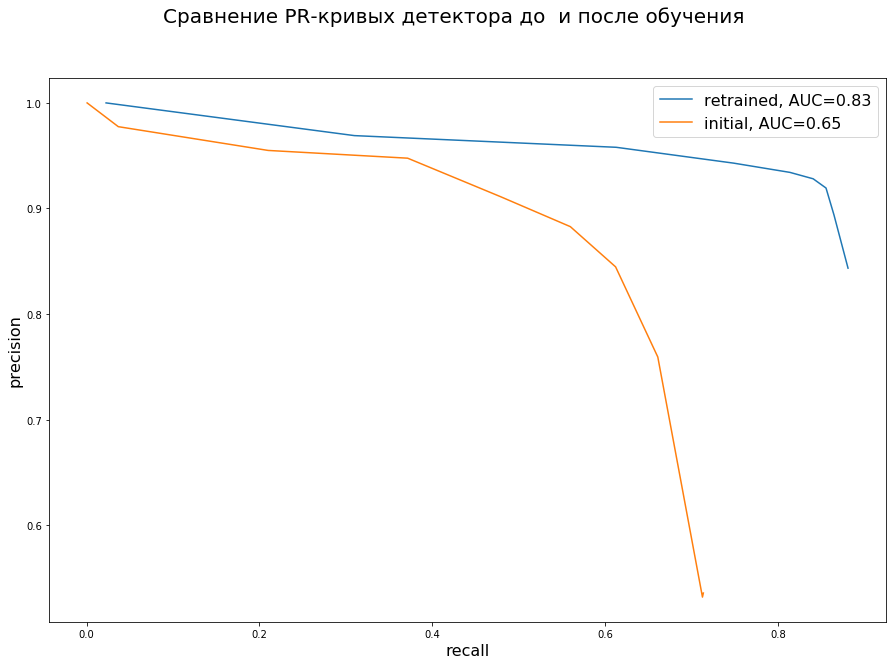

In [222]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(rec, prec, label='retrained, AUC=0.83')
ax.plot(rec_init, prec_init, label='initial, AUC=0.65')
ax.set_xlabel('recall')
ax.set_ylabel('precision')
fig.suptitle('Сравнение PR-кривых детектора до  и после обучения', fontsize=20)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.legend(prop={'size': 16})
for item in [ax.xaxis.label, ax.yaxis.label]:
    item.set_fontsize(16)
plt.show()
plt.savefig(os.path.expanduser('~/d_test/data/models/darkflow_retrain_all_imgs/metrics/pr-curves.jpg'))
#fig.savefig('c:/my_cv_work/fig1.png')

In [202]:
from sklearn.metrics import auc

In [207]:
auc(rec, prec)

0.82565524976483051

In [208]:
auc(rec_init, prec_init)

0.64692410169945469

In [205]:
prec_init[-2] = 0.5*(prec_init[-1] + prec_init[-3])

## Строим precision-recall для необученной модели

In [157]:
weights = os.path.join(build_path, 'bin', 'yolo.weights')

In [183]:
options = dict()
options['model'] = os.path.join(build_path, 'cfg', 'yolo.cfg')
options['load'] = weights
options['config'] = cfg
options['labels'] = labels
options['train'] = False
options['gpu'] = 0.8
options["subdivisions"] = 1
options['backup'] = backup
options['summary'] = summary
options['threshold'] = 0.5

In [184]:
tf.reset_default_graph()

In [185]:
tfnet = TFNet(options)

Parsing /home/shareduser/d_test/data/models/yolo_init_config/cfg/yolo.cfg
Loading /home/shareduser/d_test/data/models/yolo_init_config/bin/yolo.weights ...
Successfully identified 203934260 bytes
Finished in 0.029525279998779297s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)


In [186]:
img_data = cv2.cvtColor(img_data, cv2.COLOR_BGR2RGB)
tfnet.return_predict(img_data)

[{'bottomright': {'x': 643, 'y': 712},
  'confidence': 0.55682933,
  'label': 'person',
  'topleft': {'x': 495, 'y': 535}},
 {'bottomright': {'x': 692, 'y': 693},
  'confidence': 0.53652489,
  'label': 'person',
  'topleft': {'x': 596, 'y': 558}}]

In [188]:
metric_path = os.path.expanduser("~/d_test/data/models/darkflow_retrain_all_imgs/metrics/init")

In [190]:
for threshold in thresholds:
    options['threshold'] = threshold
    data_filename = 'threshold_' + str(threshold) + '.json'
    log_filename = 'log_threshold_' + str(threshold) + '.txt'
    tfnet = TFNet(options)
    darkflow_predict_boxes_from_model(tfnet, images_source_path, metric_path, filelist = filenames,
                           num_files=None, data_filename=data_filename, log_filename=log_filename,
                           verbose=False)

Parsing /home/shareduser/d_test/data/models/yolo_init_config/cfg/yolo.cfg
Loading /home/shareduser/d_test/data/models/yolo_init_config/bin/yolo.weights ...
Successfully identified 203934260 bytes
Finished in 0.048815011978149414s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)


Finished in 3.5216140747070312s

Parsing /home/shareduser/d_test/data/models/yolo_init_config/cfg/yolo.cfg
Loading /home/shareduser/d_test/data/models/yolo_init_config/bin/yolo.weights ...
Successfully identified 203934260 bytes
Finished in 0.01202702522277832s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  

 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 19, 19, 1024)
 Load  |  Yep!  | conv 1x1p0_1    linear           | (?, 19, 19, 425)
-------+--------+----------------------------------+---------------
GPU mode with 0.8 usage
Finished in 6.399007558822632s

Parsing /home/shareduser/d_test/data/models/yolo_init_config/cfg/yolo.cfg
Loading /home/shareduser/d_test/data/models/yolo_init_config/bin/yolo.weights ...
Successfully identified 203934260 bytes
Finished in 0.02820873260498047s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp

 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 19, 19, 1024)
 Load  |  Yep!  | conv 1x1p0_1    linear           | (?, 19, 19, 425)
-------+--------+----------------------------------+---------------
GPU mode with 0.8 usage
Finished in 6.799740314483643s

Parsing /home/shareduser/d_test/data/models/yolo_init_config/cfg/yolo.cfg
Loading /home/shareduser/d_test/data/models/yolo_init_config/bin/yolo.weights ...
Successfully identified 203934260 bytes
Finished in 0.01759481430053711s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp

In [192]:
scores_init = []
for threshold in thresholds:
    for file in os.listdir(metric_path):
        if str(threshold) in file and file.endswith('.json'):
            print(file)
            precision, recall, HITS_TOT, NO_TOT, NR_TOT = detection_scores(os.path.join(path2, gt_file),
                                                                           os.path.join(metric_path, file))
            scores_init.append({'threshold': threshold,
                           'precision': precision,
                           'recall': recall,
                           'hits': HITS_TOT,
                           'number of detections': NO_TOT,
                           'number of relevant objects': NR_TOT})

threshold_0.0.json
threshold_0.1.json
threshold_0.2.json
threshold_0.3.json
threshold_0.4.json
threshold_0.5.json
threshold_0.6.json
threshold_0.7.json
threshold_0.8.json
threshold_0.9.json


In [193]:
scores_init

[{'hits': 838.0,
  'number of detections': 1564.0,
  'number of relevant objects': 1175.0,
  'precision': 0.5358056265984654,
  'recall': 0.7131914893617022,
  'threshold': 0.0},
 {'hits': 1007.0,
  'number of detections': 1893.0,
  'number of relevant objects': 1414.0,
  'precision': 0.531959852086635,
  'recall': 0.7121640735502122,
  'threshold': 0.10000000000000001},
 {'hits': 934.0,
  'number of detections': 1230.0,
  'number of relevant objects': 1414.0,
  'precision': 0.759349593495935,
  'recall': 0.6605374823196606,
  'threshold': 0.20000000000000001},
 {'hits': 865.0,
  'number of detections': 1024.0,
  'number of relevant objects': 1414.0,
  'precision': 0.8447265625,
  'recall': 0.6117397454031117,
  'threshold': 0.30000000000000004},
 {'hits': 791.0,
  'number of detections': 896.0,
  'number of relevant objects': 1414.0,
  'precision': 0.8828125,
  'recall': 0.5594059405940595,
  'threshold': 0.40000000000000002},
 {'hits': 677.0,
  'number of detections': 743.0,
  'numbe

In [194]:
prec_init = []
rec_init = []
for s in scores_init:
    prec_init.append(s['precision'])
    rec_init.append(s['recall'])

In [150]:
key_ = data__.keys()

In [152]:
key_ ='/home/shareduser/d_test/data/stuff_data/cam_1_imgs/cframe_2082.jpg'

In [153]:
data__ = data__[key_]

In [133]:
t_img = cv2.imread(key_)

In [139]:
for bbox in data__['bboxes']:
    t, l = bbox['topleft']
    b, r = bbox['bottomright']
    w = b-t
    h = r-l
    cv2.rectangle(t_img, (t,l),(b,r), (255,0,0))

In [154]:
data__

{'bboxes': [{'bottomright': [54, 33], 'topleft': [7, 5]},
  {'bottomright': [124, 32], 'topleft': [74, 5]},
  {'bottomright': [227, 132], 'topleft': [0, 0]},
  {'bottomright': [327, 32], 'topleft': [280, 7]},
  {'bottomright': [685, 132], 'topleft': [458, 0]},
  {'bottomright': [731, 33], 'topleft': [688, 7]},
  {'bottomright': [800, 32], 'topleft': [758, 5]},
  {'bottomright': [889, 154], 'topleft': [659, 0]},
  {'bottomright': [864, 32], 'topleft': [823, 6]},
  {'bottomright': [929, 33], 'topleft': [892, 9]},
  {'bottomright': [999, 34], 'topleft': [961, 6]},
  {'bottomright': [1066, 33], 'topleft': [1023, 3]},
  {'bottomright': [1279, 58], 'topleft': [1176, 0]},
  {'bottomright': [50, 70], 'topleft': [6, 44]},
  {'bottomright': [285, 122], 'topleft': [0, 0]},
  {'bottomright': [120, 71], 'topleft': [78, 42]},
  {'bottomright': [187, 72], 'topleft': [147, 44]},
  {'bottomright': [255, 73], 'topleft': [213, 42]},
  {'bottomright': [322, 70], 'topleft': [282, 45]},
  {'bottomright': [4

In [140]:
t_img = cv2.cvtColor(t_img, cv2.COLOR_BGR2RGB)

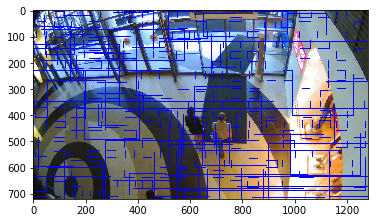

In [141]:
plt.imshow(t_img)
plt.show()

In [155]:
import tensorflow as tf

In [156]:
tf.reset_default_graph()